# let's see how mean_shift_algo works with uncommon datasets

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd     
import seaborn as sns

In [18]:
df = pd.read_csv('Aggregation.csv')
print(df.shape)
df.head()

(787, 3)


,15.55,28.65,2
0,14.90,27.55,2
1,14.45,28.35,2
2,14.15,28.80,2
3,13.75,28.05,2
4,13.35,28.45,2


In [19]:
cdf = df.iloc[:, 0:2].values
cdf[:5]

array([[14.9 , 27.55],
       [14.45, 28.35],
       [14.15, 28.8 ],
       [13.75, 28.05],
       [13.35, 28.45]])

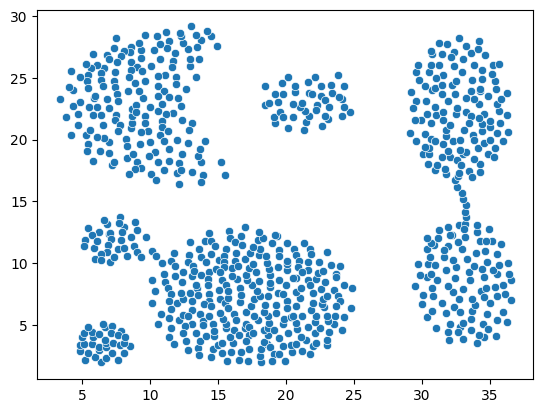

In [20]:
sns.scatterplot(x=cdf[:, 0], y=cdf[:, 1]);

[0 1 2 3]
0.9568258927607173


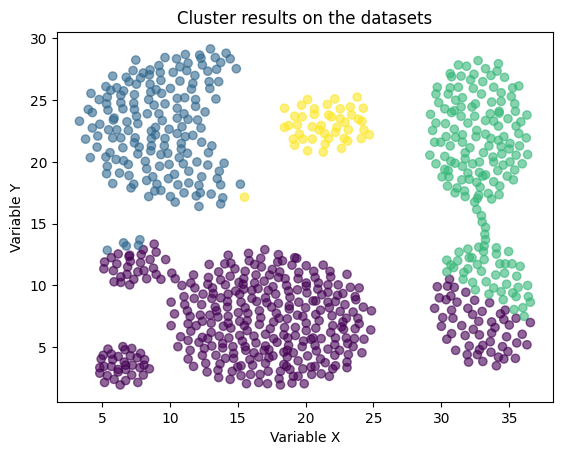

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


# 0.3 means that out of all possible distances between points, a distance of 30% is chosen.
bandwidth = estimate_bandwidth(cdf, quantile=0.007)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('meanshift', MeanShift(bandwidth=bandwidth))
])

pipe.fit(cdf)

labels = pipe.named_steps['meanshift'].labels_
print(np.unique(labels))
print(bandwidth)


plt.scatter(cdf[:, 0], cdf[:, 1], c=labels.astype(float), alpha=0.6);

plt.title('Cluster results on the datasets')
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.show()

# with 4 clusters, it will looks like this which is not that good

[0 1 2 3 4 5]
0.7181581987513386


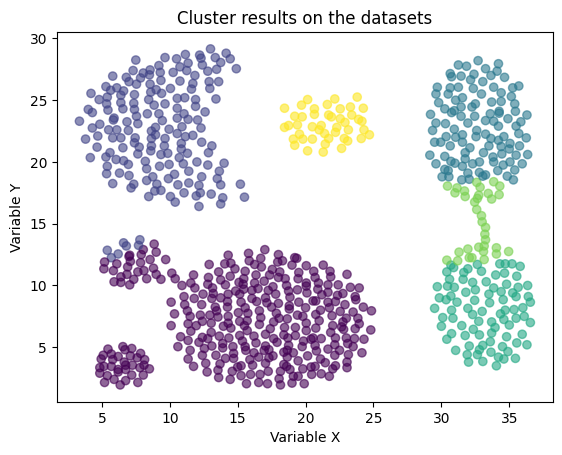

In [ ]:
# what about 6 clusters?
bandwidth = estimate_bandwidth(cdf, quantile=0.005)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('meanshift', MeanShift(bandwidth=bandwidth))
])

pipe.fit(cdf)

labels = pipe.named_steps['meanshift'].labels_
print(np.unique(labels))
print(bandwidth)


plt.scatter(cdf[:, 0], cdf[:, 1], c=labels.astype(float), alpha=0.6);

plt.title('Cluster results on the datasets')
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.show()

In [60]:
# what about 7 clusters?
bandwidth = estimate_bandwidth(cdf, quantile=0.0026)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('meanshift', MeanShift(bandwidth=bandwidth))
])

pipe.fit(cdf)

labels = pipe.named_steps['meanshift'].labels_
print(np.unique(labels))
print(bandwidth)


# plt.scatter(cdf[:, 0], cdf[:, 1], c=labels.astype(float), alpha=0.6);

# plt.title('Cluster results on the datasets')
# plt.xlabel('Variable X')
# plt.ylabel('Variable Y')
# plt.show()

[0 1 2 3 4 5]
0.5491097479870147


[0 1 2 3 4 5]
0.7181581987513386


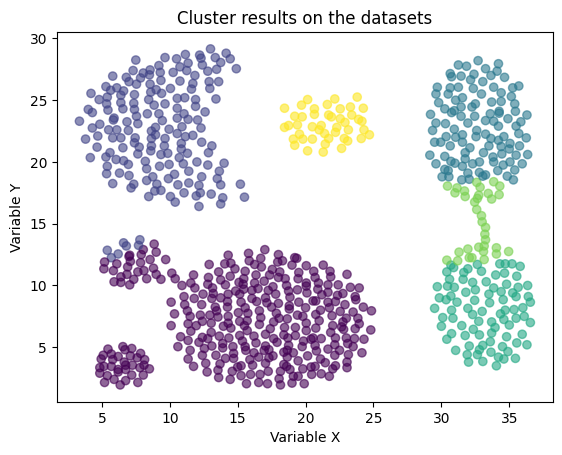

In [74]:
# what about 7 clusters?
bandwidth = estimate_bandwidth(cdf, quantile=0.0045)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('meanshift', MeanShift(bandwidth=bandwidth))
])

pipe.fit(cdf)

labels = pipe.named_steps['meanshift'].labels_
print(np.unique(labels))
print(bandwidth)


plt.scatter(cdf[:, 0], cdf[:, 1], c=labels.astype(float), alpha=0.6);

plt.title('Cluster results on the datasets')
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.show()

# seems like mean shift wouldn't work well on datasets with different size of clusters